## one hidden layer, sigmoid, squared loss

In [14]:
import numpy as np

'''read the data'''

# Specify the path to the CSV file
path_train = 'data/MNIST_train_1000.csv'
path_test = 'data/MNIST_test_100.csv'


data_train = np.genfromtxt(path_train, delimiter=',', skip_header=0, dtype=int)
data_test = np.genfromtxt(path_test, delimiter=',', skip_header=0, dtype=int)

In [15]:
m,m1 = data_train.shape[0], data_test.shape[0]
ny = 10

In [16]:
'''
get the training and test split and one-hot embedding of labels 

notice that each example is a column
'''

X_train = data_train[:,1:].T/255

Y_train = np.zeros([ny,m])
Y_train[data_train[:,0],range(m)]=1


X_test = data_test[:,1:].T/255

Y_test = np.zeros([ny,m1])
Y_test[data_test[:,0],range(m1)]=1

nx = X_train.shape[0]

In [17]:
'''define mini-batches and set up the number of hidden nodes'''

batch_size = 20
nh = 100

In [18]:
'''initialise weights and biases for three layer feed forward fully connected neural network'''

rng = np.random.default_rng()
W1 = (1/nx**0.5)*rng.normal(0,1,[nx,nh])
b1 = np.zeros([nh,1])
W2 = (1/nh**0.5)*rng.normal(0,1,[nh,ny])
b2 = np.zeros([ny,1])

In [19]:
''' define a few helper functions and hyperparameters '''
def sig(x):
    return 1/(1+np.exp(-x))

n_batches = int(m/batch_size)
lr = 0.05
n_epoch = 100

errors =[]

In [20]:
''' training '''

for epoch in range(n_epoch):
    error = 0
    # permute the data for SGD
    perm_idx = np.random.permutation(m)
    X_train = X_train[:,perm_idx]
    Y_train = Y_train[:,perm_idx]
    for bat in range(n_batches):
        x_batch = X_train[:,bat*batch_size:(1+bat)*batch_size]
        y_batch = Y_train[:,bat*batch_size:(1+bat)*batch_size]
        # forward pass
        z1 = np.matmul(W1.T,x_batch) + b1
        a1 = sig(z1)
        z2 = np.matmul(W2.T,a1) + b2
        a2 = sig(z2)
        # backward pass
        e = y_batch - a2
        A2 = sig(z2)*(1-sig(z2))
        S2 = - A2*e
        A1 = sig(z1)*(1-sig(z1))
        S1 = A1*np.matmul(W2,S2)
        # gradient descent
        dW2 = np.matmul(a1,S2.T)
        db2 = np.sum(S2, axis = 1, keepdims=True)
        dW1 = np.matmul(x_batch,S1.T)
        db1 = np.sum(S1, axis = 1, keepdims=True)
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        # compute the error 
        error += 0.5*np.sum(e*e)
    # report error of the current epoch
    print("Epoch:", epoch, "TSE:", error)
    errors.append(error)
        
    
    

Epoch: 0 TSE: 457.6992418787478
Epoch: 1 TSE: 367.065742640946
Epoch: 2 TSE: 275.9192270807881
Epoch: 3 TSE: 215.59707747440405
Epoch: 4 TSE: 180.8484873931163
Epoch: 5 TSE: 153.73070803493636
Epoch: 6 TSE: 135.82142675664636
Epoch: 7 TSE: 121.1760403184296
Epoch: 8 TSE: 108.13564580147187
Epoch: 9 TSE: 100.36368092369887
Epoch: 10 TSE: 92.92641374039003
Epoch: 11 TSE: 86.04722829054862
Epoch: 12 TSE: 80.63256802891941
Epoch: 13 TSE: 76.0246346283138
Epoch: 14 TSE: 71.91820432472478
Epoch: 15 TSE: 67.88896257641805
Epoch: 16 TSE: 64.28204829104918
Epoch: 17 TSE: 61.15492245840896
Epoch: 18 TSE: 57.85851126459079
Epoch: 19 TSE: 56.12894704437413
Epoch: 20 TSE: 53.331020569951704
Epoch: 21 TSE: 50.67842685372707
Epoch: 22 TSE: 48.27361843229564
Epoch: 23 TSE: 46.71045460292774
Epoch: 24 TSE: 44.59183286779522
Epoch: 25 TSE: 42.0840140282102
Epoch: 26 TSE: 40.871045626208556
Epoch: 27 TSE: 38.95088062560546
Epoch: 28 TSE: 37.92253627877397
Epoch: 29 TSE: 36.30887477104059
Epoch: 30 TSE: 3

Text(0.5, 1.0, '1 hidden, TSE, sigmoid')

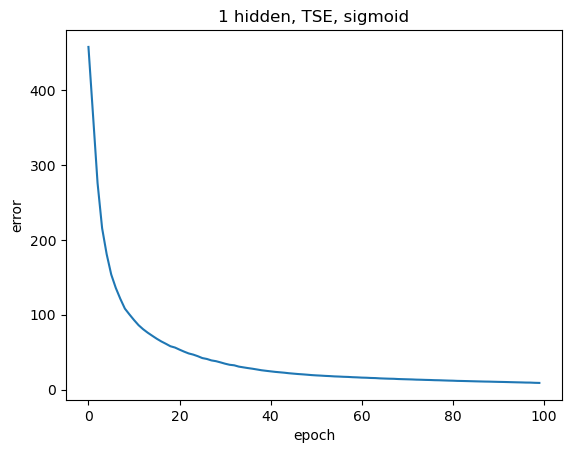

In [21]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('1 hidden, TSE, sigmoid')

# Test  88%

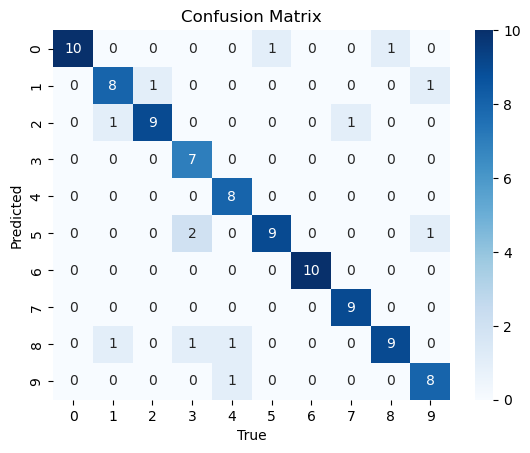

In [22]:
'''Forward pass the test data '''

z1 = np.matmul(W1.T,X_test) + b1
a1 = sig(z1)
z2 = np.matmul(W2.T,a1) + b2
a2 = sig(z2)

''' turn the output into predictions '''

pos = np.argmax(a2, axis =0)
y_pred = np.zeros_like(a2)
y_pred[pos,range(y_pred.shape[1])] = 1

''' compute the confusion matirx '''
confusion = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        confusion[i,j] = np.dot(y_pred[i],Y_test[j])

import seaborn as sns

confusion_int = confusion.astype(int)

sns.heatmap(confusion_int, annot = True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [23]:
np.trace(confusion)/X_test.shape[1]

0.87